# Object: 验证lambda layer和loss的等价性
## 构造一个简单的数据集，然后使用lambda和loss分别fit，看weight是否等价

### KR1: 把loss作为layer还是loss function看不出差异点
### KR2: 经常train坏掉，为什么？overfit?
### KR3: sigmoid和tanh为什么不工作？和relu的差异很大

KR2 问题：  ~~注意到一些layer没有被initialized到，所以导致无法被train到，所以导致了~~ 不对，一些dense的bias确实是init成0的。和overfit没关系

KR1: loss作为layer和loss fn结果非常类似, 在activation=tanh的情况下表现明显，tanh和relu不同的是tanh很稳定

KR3: tanh & sigmoid的activation，被缩在一起，基本上是一个直线，underfit很严重

In [21]:
from keras import backend as K
import tensorflow as tf
import numpy as np
from keras.models import Model, Sequential, Input
import matplotlib.pyplot as plt
import keras
from keras.models import Model, Sequential, Input
from keras.layers import Dense, Lambda, Dropout
from keras import losses
%matplotlib inline

In [22]:
## generate the X
def sample(size):
    X = np.random.random(size) * 2.0 - 1.0
    noise = np.random.random(size) / 10.0
    Y = X * X + 1.0 + noise
    return X.reshape(size, 1),Y.reshape(size, 1)

train X shape (128, 1)
train y shape (128, 1)


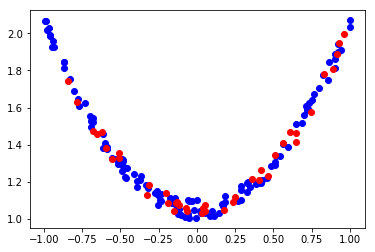

In [23]:
m=64 * 2
train_X, train_y = sample(m)
val_X, val_y = sample(m/3)
layers = [2]
activation = "relu"

# plot the sample and val data
plt.plot(train_X, train_y, "bo")
plt.plot(val_X, val_y, "ro")
print "train X shape", train_X.shape
print "train y shape", train_y.shape

In [24]:
# fit by loss
x_input = Input(shape=(1,))
x = x_input
for num in layers:
    x = Dense(num, activation=activation)(x)
#     x = Dropout(0.2)(x)
x = Dense(1, activation=activation)(x)
model = Model(x_input, x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='sgd',
              loss='mse')
model.fit(train_X,
          train_y,
          epochs=1000, 
          batch_size=32,
          shuffle=True,
          validation_data = (val_X, val_y))

Train on 128 samples, validate on 42 samples
Epoch 1/1000
128/128 [==============================] - 0s 2ms/step - loss: 2.0059 - val_loss: 1.8300
Epoch 2/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 3/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 4/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 5/1000
128/128 [==============================] - 0s 54us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 6/1000
128/128 [==============================] - 0s 67us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 7/1000
128/128 [==============================] - 0s 48us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 8/1000
128/128 [==============================] - 0s 70us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 9/1000
128/128 [==============================] - 0s 58us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 10/1000
128/128 [======

128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 80/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 81/1000
128/128 [==============================] - 0s 48us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 82/1000
128/128 [==============================] - 0s 46us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 83/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 84/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 85/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 86/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 87/1000
128/128 [==============================] - 0s 64us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 88/1000
128/128 [==============================] - 0s 48us/step - loss: 

Epoch 157/1000
128/128 [==============================] - 0s 62us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 158/1000
128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 159/1000
128/128 [==============================] - 0s 48us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 160/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 161/1000
128/128 [==============================] - 0s 54us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 162/1000
128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 163/1000
128/128 [==============================] - 0s 56us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 164/1000
128/128 [==============================] - 0s 77us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 165/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 166/1000
128/128 [==============================]

128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 236/1000
128/128 [==============================] - 0s 56us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 237/1000
128/128 [==============================] - 0s 48us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 238/1000
128/128 [==============================] - 0s 58us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 239/1000
128/128 [==============================] - 0s 58us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 240/1000
128/128 [==============================] - 0s 63us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 241/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 242/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 243/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 244/1000
128/128 [==============================] - 0s 56us/step

128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 314/1000
128/128 [==============================] - 0s 73us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 315/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 316/1000
128/128 [==============================] - 0s 75us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 317/1000
128/128 [==============================] - 0s 75us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 318/1000
128/128 [==============================] - 0s 68us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 319/1000
128/128 [==============================] - 0s 65us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 320/1000
128/128 [==============================] - 0s 69us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 321/1000
128/128 [==============================] - 0s 63us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 322/1000
128/128 [==============================] - 0s 68us/step

128/128 [==============================] - ETA: 0s - loss: 2.202 - 0s 74us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 391/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 392/1000
128/128 [==============================] - 0s 50us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 393/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 394/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 395/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 396/1000
128/128 [==============================] - 0s 58us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 397/1000
128/128 [==============================] - 0s 66us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 398/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 399/1000
128/128 [======================

128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 468/1000
128/128 [==============================] - 0s 47us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 469/1000
128/128 [==============================] - 0s 46us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 470/1000
128/128 [==============================] - 0s 43us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 471/1000
128/128 [==============================] - 0s 48us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 472/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 473/1000
128/128 [==============================] - 0s 62us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 474/1000
128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 475/1000
128/128 [==============================] - 0s 77us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 476/1000
128/128 [==============================] - 0s 70us/step

128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 545/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 546/1000
128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 547/1000
128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 548/1000
128/128 [==============================] - 0s 44us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 549/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 550/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 551/1000
128/128 [==============================] - 0s 63us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 552/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 553/1000
128/128 [==============================] - 0s 58us/step

Epoch 622/1000
128/128 [==============================] - 0s 50us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 623/1000
128/128 [==============================] - 0s 66us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 624/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 625/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 626/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 627/1000
128/128 [==============================] - 0s 65us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 628/1000
128/128 [==============================] - 0s 54us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 629/1000
128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 630/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 631/1000
128/128 [==============================]

128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 701/1000
128/128 [==============================] - 0s 71us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 702/1000
128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 703/1000
128/128 [==============================] - 0s 54us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 704/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 705/1000
128/128 [==============================] - 0s 54us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 706/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 707/1000
128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 708/1000
128/128 [==============================] - 0s 53us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 709/1000
128/128 [==============================] - 0s 66us/step

128/128 [==============================] - 0s 52us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 778/1000
128/128 [==============================] - 0s 53us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 779/1000
128/128 [==============================] - 0s 67us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 780/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 781/1000
128/128 [==============================] - 0s 47us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 782/1000
128/128 [==============================] - 0s 56us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 783/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 784/1000
128/128 [==============================] - 0s 63us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 785/1000
128/128 [==============================] - 0s 46us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 786/1000
128/128 [==============================] - 0s 59us/step

Epoch 855/1000
128/128 [==============================] - 0s 58us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 856/1000
128/128 [==============================] - 0s 50us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 857/1000
128/128 [==============================] - 0s 46us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 858/1000
128/128 [==============================] - 0s 58us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 859/1000
128/128 [==============================] - 0s 56us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 860/1000
128/128 [==============================] - 0s 67us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 861/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 862/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 863/1000
128/128 [==============================] - 0s 46us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 864/1000
128/128 [==============================]

128/128 [==============================] - 0s 53us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 934/1000
128/128 [==============================] - 0s 48us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 935/1000
128/128 [==============================] - 0s 59us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 936/1000
128/128 [==============================] - 0s 46us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 937/1000
128/128 [==============================] - 0s 61us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 938/1000
128/128 [==============================] - 0s 57us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 939/1000
128/128 [==============================] - 0s 60us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 940/1000
128/128 [==============================] - 0s 51us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 941/1000
128/128 [==============================] - 0s 55us/step - loss: 2.0059 - val_loss: 1.8300
Epoch 942/1000
128/128 [==============================] - 0s 52us/step

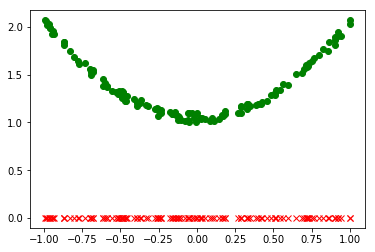

In [26]:
y_ = model.predict(train_X)

plt.plot(train_X, train_y, "go")
plt.plot(train_X, y_, "rx")
plt.show()

In [6]:
# fit by a lambda layer
x_input = Input(shape=(1,))
x = x_input
for num in layers:
    x = Dense(num, activation=activation)(x)
    x = Dropout(0.2)(x)
x = Dense(1, activation=activation)(x)

def loss_fn(args):
    (y_,y) = args
    return losses.mean_squared_error(y, y_)

loss_model_predictor = Model(input = x_input, output = x)

y_input = Input(shape=(1,))

loss_layer = Lambda(loss_fn, 
            output_shape=(1, ),
            name='yolo_loss',
            arguments={})([x, y_input])

loss_model = Model(input = ([x_input, y_input]), outputs = loss_layer)

loss_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            4           input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2)            0           dense_3[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1)            3           dropout_1[0][0]                  
__________________________________________________________________________________________________
input_3 (I

/Library/Python/2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  del sys.path[0]
/Library/Python/2.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("yo..., inputs=[<tf.Tenso...)`


In [7]:
# train the loss layer model
loss_model.compile(optimizer='adadelta',
              loss=lambda y, y_: y_)
loss_model.fit([train_X, train_y], np.zeros(len(train_y)),
               epochs=100, 
               batch_size=32,
               shuffle=True, 
               validation_data = ([val_X, val_y], np.zeros(len(val_y))))

Train on 128 samples, validate on 42 samples
Epoch 1/100
128/128 [==============================] - 0s 3ms/step - loss: 1.3978 - val_loss: 1.1829
Epoch 2/100
128/128 [==============================] - 0s 69us/step - loss: 1.4216 - val_loss: 1.1737
Epoch 3/100
128/128 [==============================] - 0s 59us/step - loss: 1.4351 - val_loss: 1.1649
Epoch 4/100
128/128 [==============================] - 0s 71us/step - loss: 1.4528 - val_loss: 1.1563
Epoch 5/100
128/128 [==============================] - 0s 56us/step - loss: 1.4441 - val_loss: 1.1470
Epoch 6/100
128/128 [==============================] - 0s 70us/step - loss: 1.4120 - val_loss: 1.1382
Epoch 7/100
128/128 [==============================] - 0s 68us/step - loss: 1.2742 - val_loss: 1.1289
Epoch 8/100
128/128 [==============================] - 0s 79us/step - loss: 1.3428 - val_loss: 1.1201
Epoch 9/100
128/128 [==============================] - 0s 56us/step - loss: 1.3420 - val_loss: 1.1114
Epoch 10/100
128/128 [================

Epoch 80/100
128/128 [==============================] - 0s 67us/step - loss: 0.9576 - val_loss: 0.6977
Epoch 81/100
128/128 [==============================] - 0s 61us/step - loss: 1.0295 - val_loss: 0.6939
Epoch 82/100
128/128 [==============================] - 0s 83us/step - loss: 0.9933 - val_loss: 0.6905
Epoch 83/100
128/128 [==============================] - 0s 69us/step - loss: 0.9813 - val_loss: 0.6871
Epoch 84/100
128/128 [==============================] - 0s 61us/step - loss: 0.9538 - val_loss: 0.6839
Epoch 85/100
128/128 [==============================] - ETA: 0s - loss: 0.731 - 0s 72us/step - loss: 0.9455 - val_loss: 0.6805
Epoch 86/100
128/128 [==============================] - 0s 68us/step - loss: 0.9744 - val_loss: 0.6771
Epoch 87/100
128/128 [==============================] - 0s 61us/step - loss: 1.0165 - val_loss: 0.6736
Epoch 88/100
128/128 [==============================] - 0s 63us/step - loss: 0.9301 - val_loss: 0.6704
Epoch 89/100
128/128 [===========================

In [8]:
for l in model.layers:
    print l.get_weights()
    print ""

print "debug the loss model:"
for l in loss_model.layers:
    print l.get_weights()
    print ""
    

[]

[array([[-0.00965631, -0.56386346]], dtype=float32), array([ 0.,  0.], dtype=float32)]

[array([[-0.83686173],
       [-0.47128063]], dtype=float32), array([ 0.], dtype=float32)]

debug the loss model:
[]

[array([[ 0.62272662,  1.29169071]], dtype=float32), array([-0.07313211,  0.11720413], dtype=float32)]

[]

[array([[ 0.01041435],
       [ 1.08175492]], dtype=float32), array([ 0.25574657], dtype=float32)]

[]

[]



In [9]:
print model.predict(np.array([-1., -.5, 0., 0.5, 1.]))

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [10]:
l1, b1 = model.layers[1].get_weights()
l2, b2 = model.layers[2].get_weights()
print "layer 1 weights", l1, b1
print "layer 2 weights", l2, b2
print "" 

x = np.array([[-1.], [-.5], [0.], [0.5], [1.]])
x_ = np.matmul(x, l1) + b1
print "after first layer", x_

x_ = x_ * (x_ > 0)
print "after relu layer", x_

print ""
x_ = np.matmul(x_, l2) + b2
print "after second layer", x_
x_ = x_ * (x_ > 0)
print "after relu layer", x_

layer 1 weights [[-0.00965631 -0.56386346]] [ 0.  0.]
layer 2 weights [[-0.83686173]
 [-0.47128063]] [ 0.]

after first layer [[ 0.00965631  0.56386346]
 [ 0.00482816  0.28193173]
 [ 0.          0.        ]
 [-0.00482816 -0.28193173]
 [-0.00965631 -0.56386346]]
after relu layer [[ 0.00965631  0.56386346]
 [ 0.00482816  0.28193173]
 [ 0.          0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]]

after second layer [[-0.27381892]
 [-0.13690946]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
after relu layer [[-0.]
 [-0.]
 [ 0.]
 [ 0.]
 [ 0.]]


evaluate the models


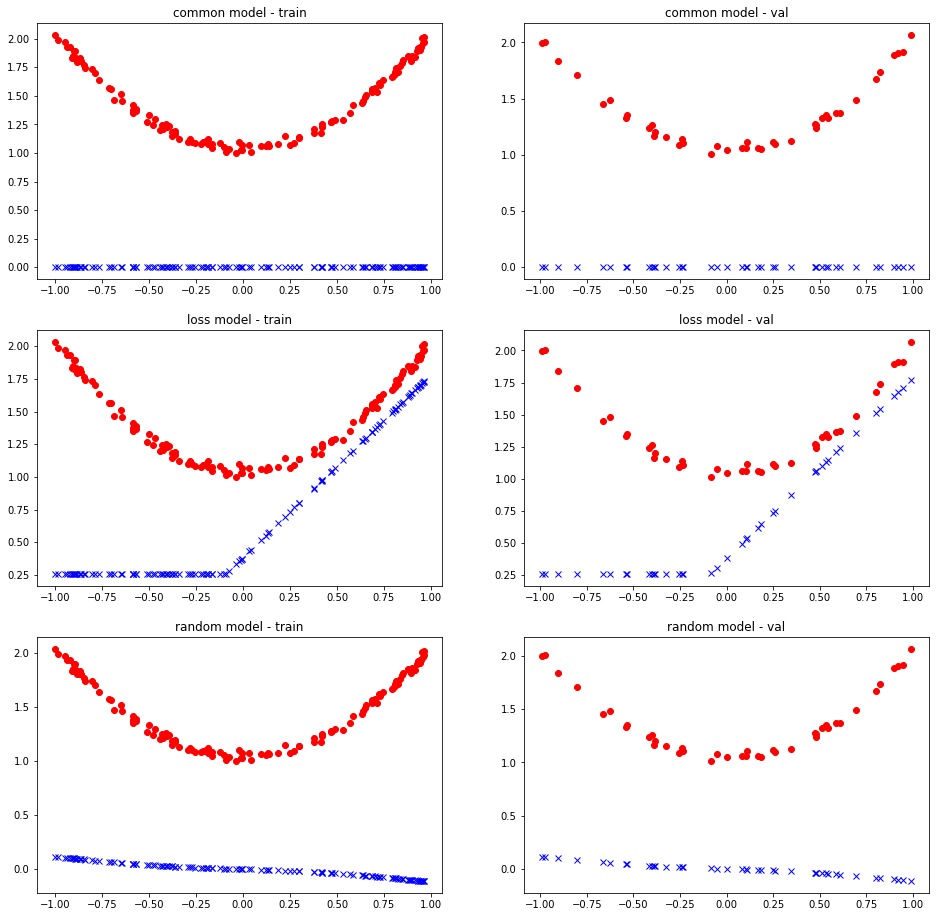

In [11]:
# evaluate the model by plot them
print "evaluate the models"
pred_train_y = model.predict(train_X)
_, axs = plt.subplots(3, 2, figsize = (16, 16))
ax = axs[0][0]
ax.set_title("common model - train")
ax.plot(train_X, train_y, "ro")
ax.plot(train_X, pred_train_y, "bx")

ax = axs[0][1]
ax.set_title("common model - val")
pred_val_y = model.predict(val_X)
ax.plot(val_X, val_y, "ro")
ax.plot(val_X, pred_val_y, "bx")

pred_train_y = loss_model_predictor.predict(train_X)
ax = axs[1][0]
ax.set_title("loss model - train")
ax.plot(train_X, train_y, "ro")
ax.plot(train_X, pred_train_y, "bx")

ax = axs[1][1]
pred_val_y = loss_model_predictor.predict(val_X)
ax.set_title("loss model - val")
ax.plot(val_X, val_y, "ro")
ax.plot(val_X, pred_val_y, "bx")

def random_predictor():
    x_input = Input(shape=(1,))
    x = x_input
    for num in layers:
        x = Dense(num, activation='tanh')(x)
    x = Dense(1, activation='tanh')(x)
    predictor = Model(x_input, x)
    
    return predictor

rand_model_predictor = random_predictor()

pred_train_y = rand_model_predictor.predict(train_X)
ax = axs[2][0]
ax.set_title("random model - train")
ax.plot(train_X, train_y, "ro")
ax.plot(train_X, pred_train_y, "bx")

ax = axs[2][1]
pred_val_y = rand_model_predictor.predict(val_X)
ax.set_title("random model - val")
ax.plot(val_X, val_y, "ro")
ax.plot(val_X, pred_val_y, "bx")